<h1 align='center'><font color='navy'>Udacity Machine Learning Engineer - Nanodegree</font></h1>
<h2 align='center'><font color='teal'>Capstone Project</font></h2>
<h3 align='center'><font color='maroon'>Amrishkumar Purohit</font></h3>                                                            

<h2><font color='olive'>Introduction</font></h2>

Estimating price of a house is quite challenging and important process as housing prices are difficult to predict, and can be influenced by a very large quantity of factors. Everyone want better home in lease amount.

Now days there are many real estate companies provide data and own define algorithm to determine best price of the house. One of such company is Zillow. Zillow has millions of data on homes across United States. 

Goal of the project is to predict price of new property going to sold in Los Angeles, Orange and Ventura county of California. Here price of home is evaluated based on features of home

<h2><font color='olive'>Table of Content</font></h2>

<h3><font color='purple'> [1.](#1) Packages and Data set</font></h3>
<h3><font color='purple'> [2.](#2) Exploratory Analysis of Data (EAD)</font></h3>

* [Step 1](#step1): Data Exploration
* [Step 2](#step2): Preprocessing
* [Step 3](#step3): Construct and Evaluate Benchmark Model
* [Step 4](#step4): Feature Selection and Model Evaluation
* [Step 5](#step5): Model Tuning
* [Step 6](#step6): Final Model Training and Prediction
* [Step 7](#step7): Conclusion

---
<a id='1'></a>
<h2><font color='olive'> [1.](#1) Packages and Data set</font></h2>

Code in this notebook is compiled with Python 3.
Here is list of packages used in this project.
- numpy 
- pandas
- bokeh
- gc
- catboost
- xgboost
- sklearn

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

from datetime import datetime
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

from sklearn import linear_model
from sklearn import cross_validation

trainFile="data/train_2016_v2.csv"
propFile="data/properties_2016.csv"

## Benchmark Model

In [35]:
#Reading Training Data
benchmarkTrain = pd.read_csv(trainFile)
benchmarkProp = pd.read_csv(propFile)

#Filling missing values with -1
benchmarkProp.fillna(-1,inplace=True)

#Merging Datafiles
df = pd.merge(benchmarkTrain, benchmarkProp, on='parcelid', suffixes=('', '_r'))

#Dropping meta columns and casting to accepted dtypes
X = df.drop(['parcelid', 'logerror', 'transactiondate',
             'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
for c in ['hashottuborspa', 'fireplaceflag', 'taxdelinquencyflag']:
    X[c] = X[c].astype('bool')
    
#Applying RandomForestRegressor  
clf = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(clf, X, df.logerror, cv=10, scoring='neg_mean_absolute_error')
print("LinearRegression Accuracy : {0:.5f}".format(scores.mean()))

LinearRegression Accuracy: -0.06850
LinearRegression Accuracy : -0.06850


<a id='2'></a>
<h2><font color='olive'> [2.](#2) Exploratory Analysis of Data (EAD)</font></h2>





In [3]:
#Reading Training Data
#train = pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])
train = pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])
print ("Shape Of Training Data: ",train.shape)
train.head()

Shape Of Training Data:  (90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
#Reading Properties Data
#prop = pd.read_csv("data/properties_2017.csv", low_memory=False)
prop = pd.read_csv("data/properties_2016.csv", low_memory=False)

print ("Shape Of Properties Data: ",prop.shape)
prop.head()

Shape Of Properties Data:  (2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
#Merging training and properties filed on unique field 'parcelid'
train = pd.merge(train, prop, on='parcelid', how='left')
print ("Shape Of Merged Training Data: ",train.shape)
train.head()

Shape Of Merged Training Data:  (90275, 60)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [6]:
#Dropping Columns who's %age of NaN values is greater than 70%
for col in list(train.columns.values):
    nanValues = float(train[col].isnull().sum()) / len(train)
    if nanValues > 0.70:
        print("Dropping column {}".format(col))
        train = train.drop([col], axis=1)
print("Shape of Training Data : {}".format(train.shape))

Dropping column architecturalstyletypeid
Dropping column basementsqft
Dropping column buildingclasstypeid
Dropping column decktypeid
Dropping column finishedfloor1squarefeet
Dropping column finishedsquarefeet13
Dropping column finishedsquarefeet15
Dropping column finishedsquarefeet50
Dropping column finishedsquarefeet6
Dropping column fireplacecnt
Dropping column hashottuborspa
Dropping column poolcnt
Dropping column poolsizesum
Dropping column pooltypeid10
Dropping column pooltypeid2
Dropping column pooltypeid7
Dropping column storytypeid
Dropping column threequarterbathnbr
Dropping column typeconstructiontypeid
Dropping column yardbuildingsqft17
Dropping column yardbuildingsqft26
Dropping column numberofstories
Dropping column fireplaceflag
Dropping column taxdelinquencyflag
Dropping column taxdelinquencyyear
Shape of Training Data : (90275, 35)


### Correlation Analysis

                           Count     Column Type
0                       parcelid           int64
1                       logerror         float64
2                transactiondate  datetime64[ns]
3          airconditioningtypeid         float64
4                    bathroomcnt         float64
5                     bedroomcnt         float64
6          buildingqualitytypeid         float64
7              calculatedbathnbr         float64
8   calculatedfinishedsquarefeet         float64
9           finishedsquarefeet12         float64
10                          fips         float64
11                   fullbathcnt         float64
12                  garagecarcnt         float64
13               garagetotalsqft         float64
14         heatingorsystemtypeid         float64
15                      latitude         float64
16                     longitude         float64
17             lotsizesquarefeet         float64
18     propertycountylandusecode          object
19         propertyl

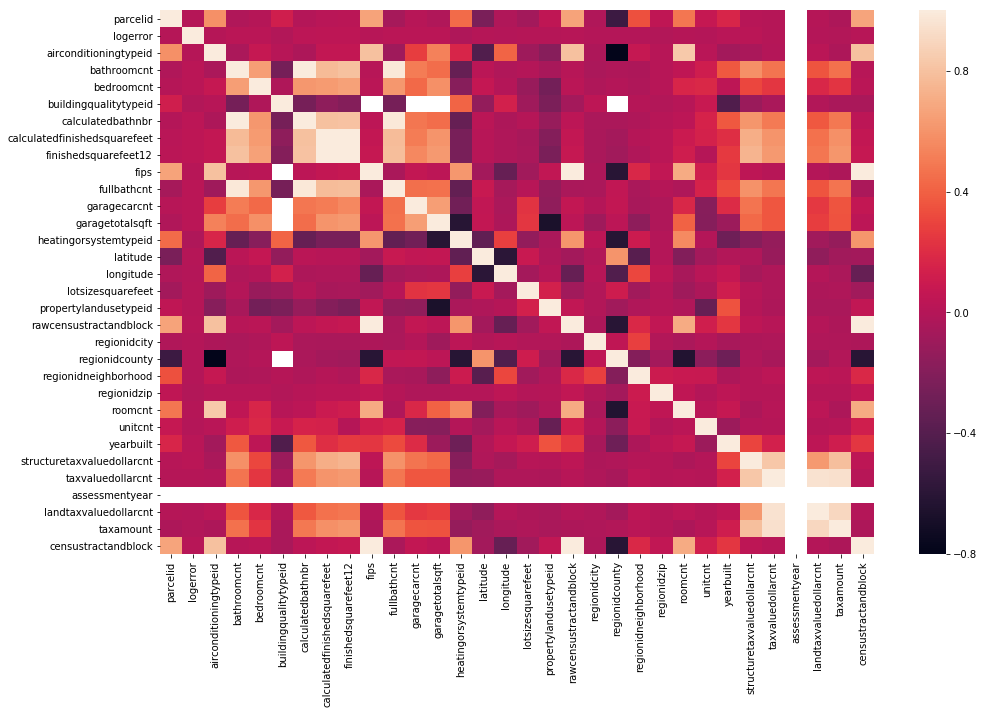

In [7]:
#Printing out all the Variables
data_type = train.dtypes.reset_index()
data_type.columns = ["Count", "Column Type"]
print(data_type)

# Correlation Matrix
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), fmt="d")
print("Shape of Training Data : {}".format(train.shape))

In [8]:
#The following pairs are highly correlated

#bathroomcnt, calculatedbathnbr and fullbathcnt
correlated_columns=['calculatedbathnbr', 'fullbathcnt']

#calculatedfinishedsquarefeet and finishedsquarefeet12    
correlated_columns.append('finishedsquarefeet12')

#fips, rawcensustractandblock, censustractandblock
correlated_columns.append('rawcensustractandblock')
correlated_columns.append('censustractandblock')

#taxvaluedollarcnt, taxamount, landtaxvaluedollarcnt
correlated_columns.append('taxvaluedollarcnt')
correlated_columns.append('landtaxvaluedollarcnt')

print(correlated_columns)

for val in correlated_columns:
    print("Dropping col {}".format(val))
    train = train.drop([val], axis=1)

['calculatedbathnbr', 'fullbathcnt', 'finishedsquarefeet12', 'rawcensustractandblock', 'censustractandblock', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt']
Dropping col calculatedbathnbr
Dropping col fullbathcnt
Dropping col finishedsquarefeet12
Dropping col rawcensustractandblock
Dropping col censustractandblock
Dropping col taxvaluedollarcnt
Dropping col landtaxvaluedollarcnt


Shape of Training Data : (90275, 28)


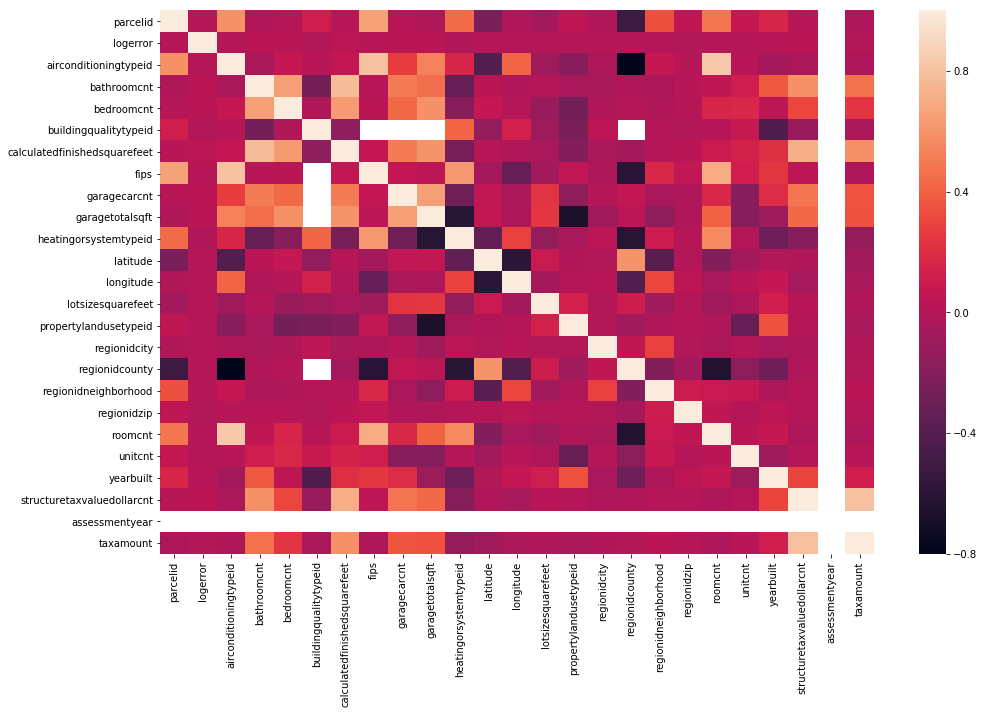

In [9]:
# Correlation Matrix after dropping highly corelated columns
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), fmt="d")
print("Shape of Training Data : {}".format(train.shape))

In [15]:
#fill median for numeric null columns
for c in train.dtypes[train.dtypes == 'float64'].index.values:
    train[c].fillna(train[c].median(), inplace = True)

In [16]:
from sklearn.preprocessing import LabelEncoder

#Imputing Null values with -1 and encoding Objects
for c in train.columns:
    train[c]=train[c].fillna(-1)
    if train[c].dtype == object:
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values))
        train[c] = lbl.transform(list(train[c].values))

## Remove Outliers

Upper Limit = 0.4638819999999963
Lower Limit = -0.3425


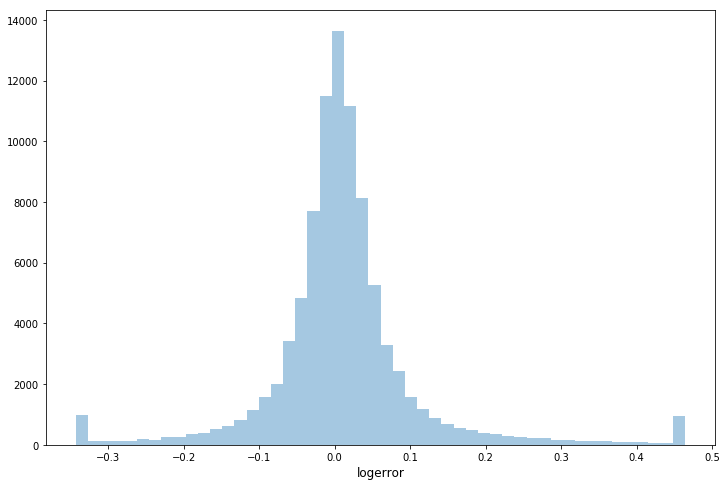

In [12]:
ulimit = np.percentile(train.logerror.values, 99)
llimit = np.percentile(train.logerror.values, 1)
train['logerror'].ix[train['logerror']>ulimit] = ulimit
train['logerror'].ix[train['logerror']<llimit] = llimit
print("Upper Limit = {}".format(ulimit))
print("Lower Limit = {}".format(llimit))

plt.figure(figsize=(12,8))
sns.distplot(train.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

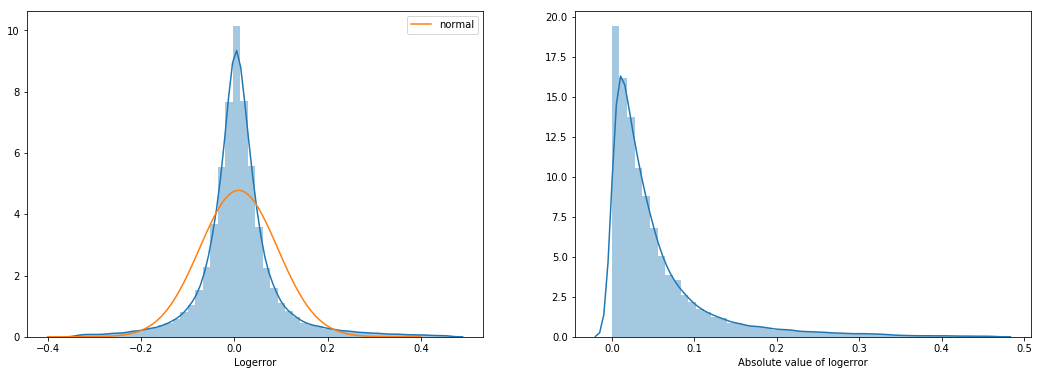

In [20]:
import matplotlib.mlab as mlab
truncated_df = train.loc[(train.logerror<ulimit) & (train.logerror>llimit), 'logerror']
# Plot distribution
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.distplot(truncated_df)
x = np.linspace(-0.4, 0.4, 100)
plt.plot(x, mlab.normpdf(x, truncated_df.mean(), truncated_df.std()), label='normal')
plt.legend()
plt.xlabel('Logerror')

plt.subplot(1, 2, 2)
sns.distplot(np.abs(truncated_df))
plt.xlabel('Absolute value of logerror')
plt.savefig('logerror-absoulte.png')
plt.show()

In [21]:
#Dropping out outliers
train=train[ train.logerror > llimit ]
train=train[ train.logerror < ulimit ]
print("Shape of Training Data : {}".format(train.shape))

Shape of Training Data : (88465, 29)


## Univariate Analysis
Dividing Data into 3 types and exploring the variables:

1. continuous = [ 'taxamount','garagetotalsqft', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet','structuretaxvaluedollarcnt'] The continuous variables are depicted through displot,

Not Considered : 'latitude', 'longitude'

2. discrete = ['bathroomcnt', 'bedroomcnt','garagecarcnt', 'roomcnt', 'unitcnt', 'yearbuilt'] The discrete variables are depicted through countplot

Not Considered : 'assessmentyear'

3. categorical = ['airconditioningtypeid', 'buildingqualitytypeid', 'heatingorsystemtypeid', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'fips', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip']
The categorical variables are depicted through barplot

Not Considered : 'propertycountylandusecode', 'propertyzoningdesc', 'regionidcity', 'regionidneighborhood', 'regionidzip'

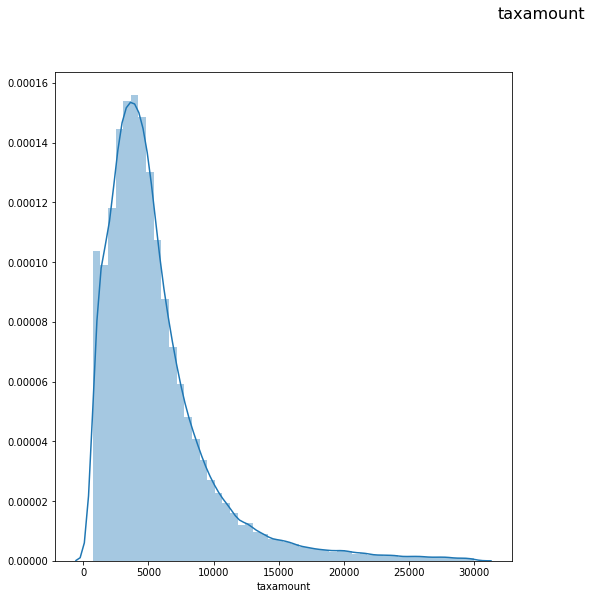

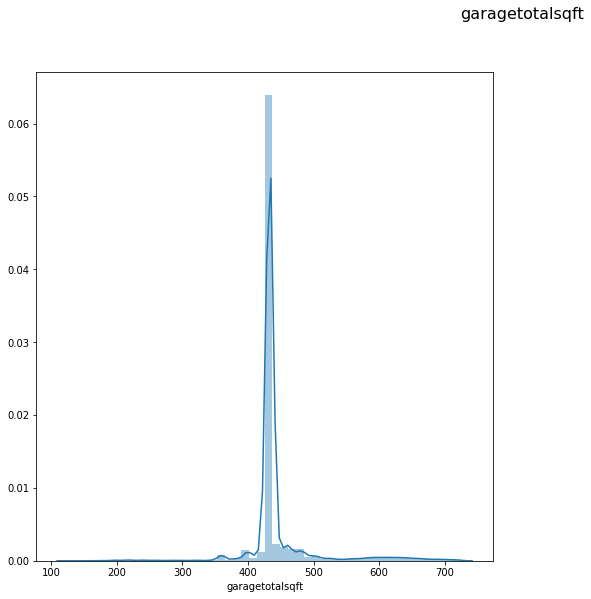

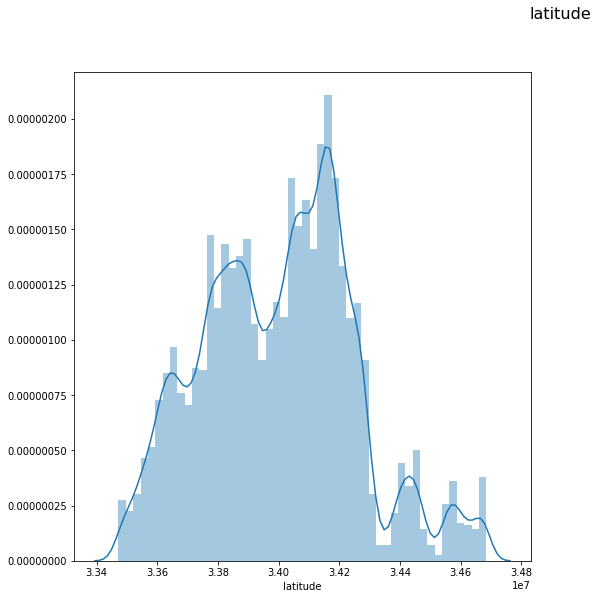

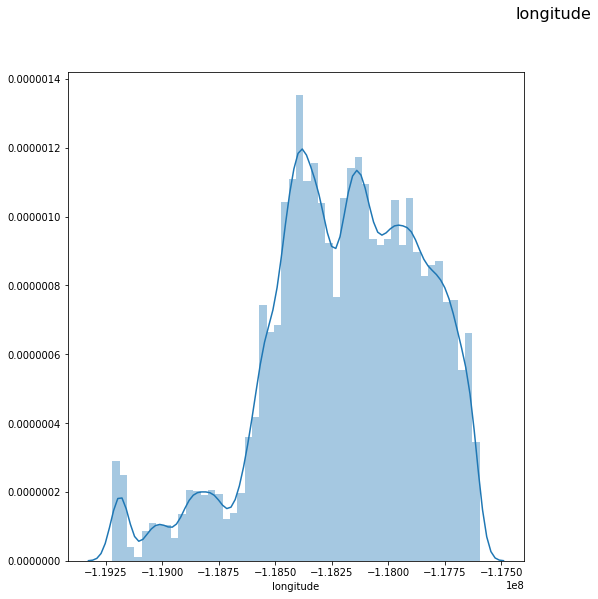

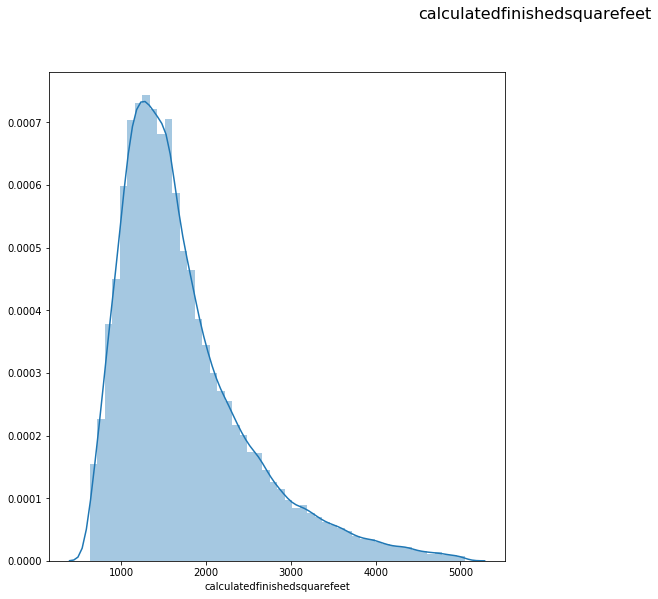

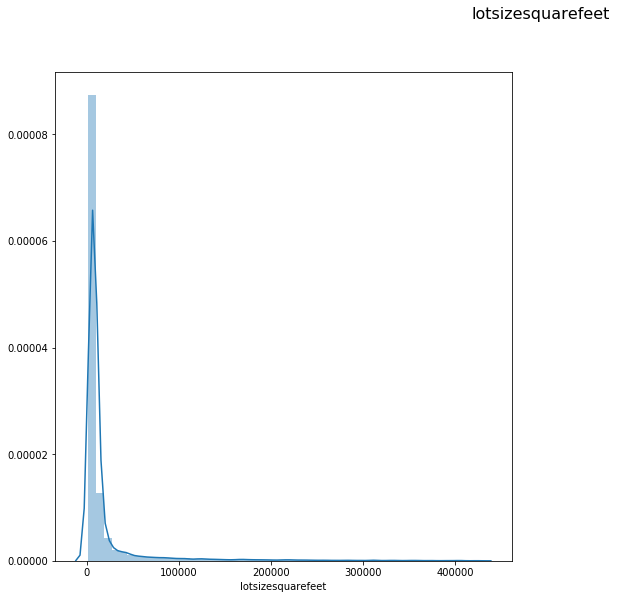

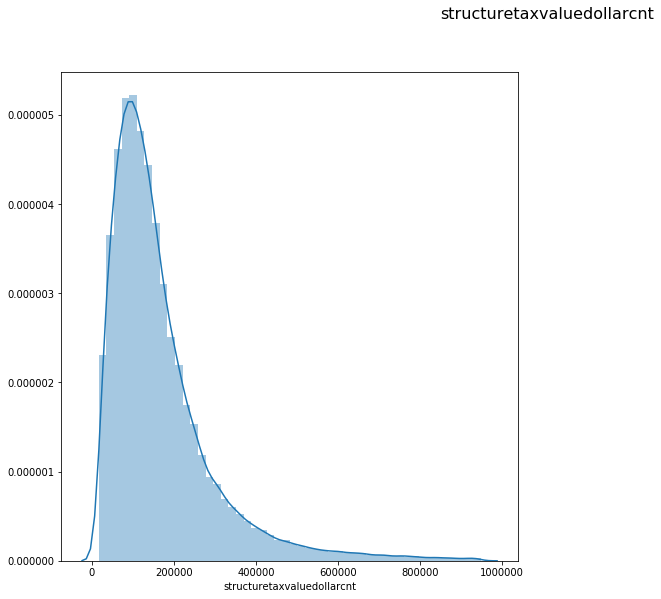

In [22]:
#Continuous Variables
continuous = [ 'taxamount','garagetotalsqft', 'latitude', 'longitude','calculatedfinishedsquarefeet', 'lotsizesquarefeet','structuretaxvaluedollarcnt']

### Continuous variable plots
for col in continuous:
    values = train[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    fig = plt.figure(figsize=(18,9));
    sns.distplot(values[(values>lower) & (values<upper)], ax = plt.subplot(121));
    plt.suptitle(col, fontsize=16)      

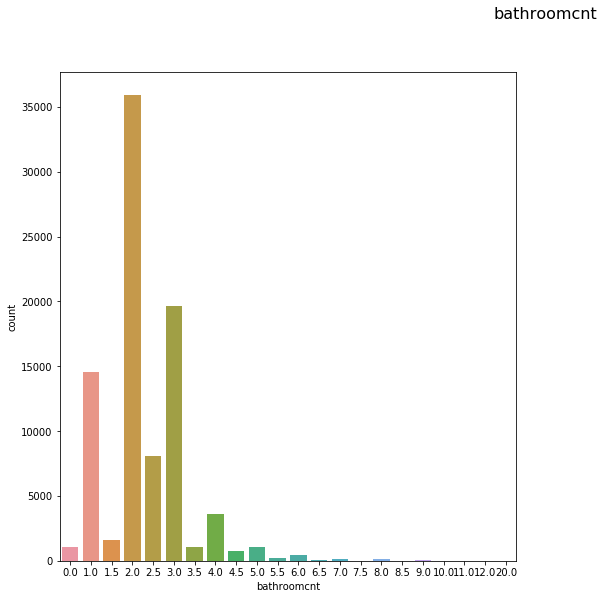

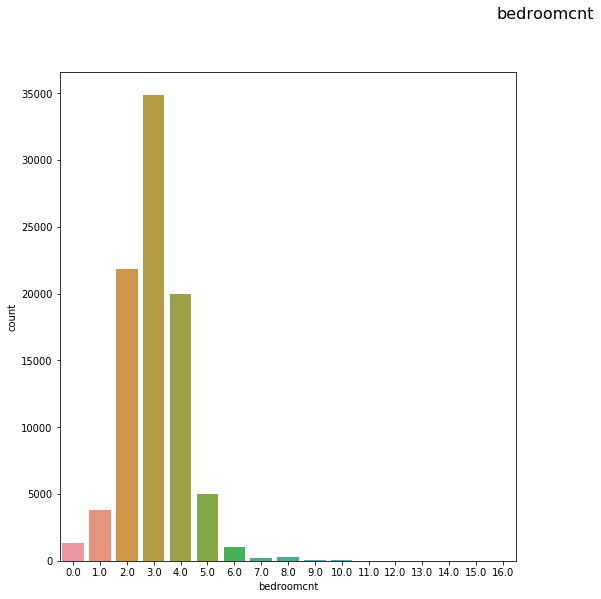

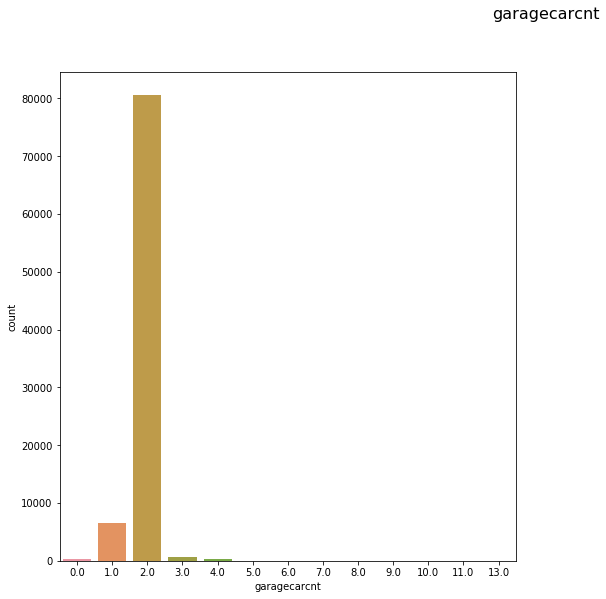

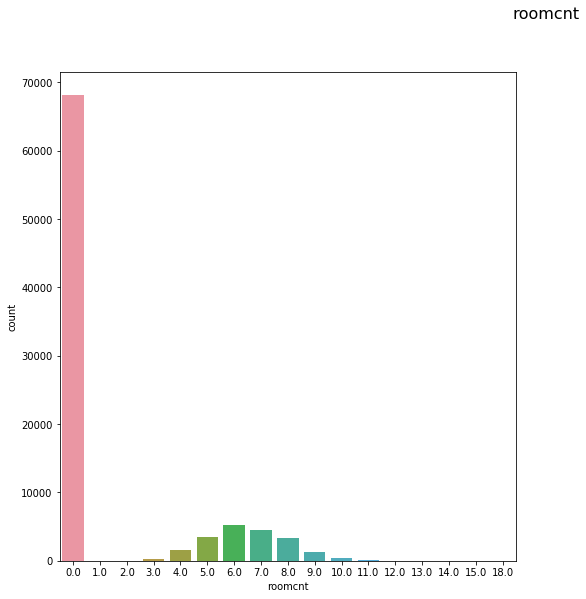

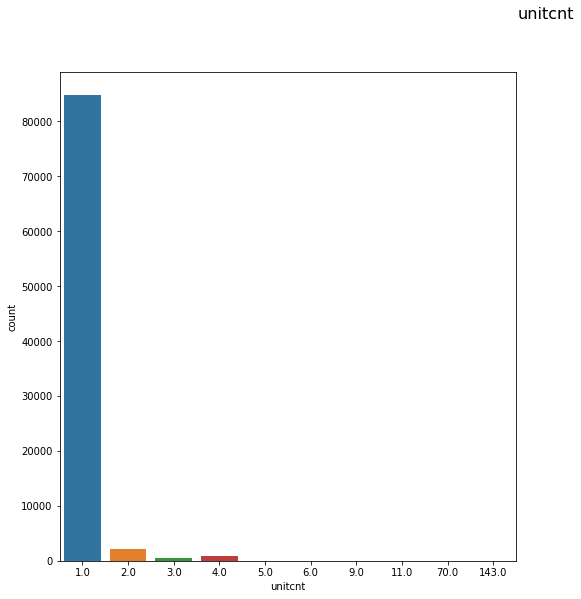

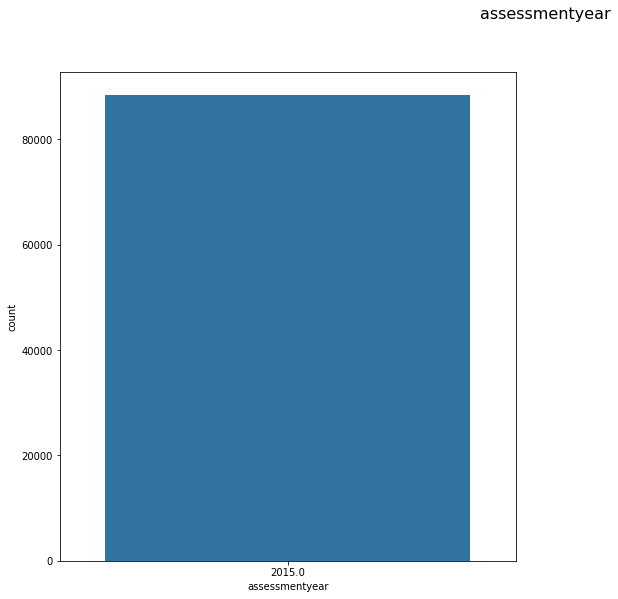

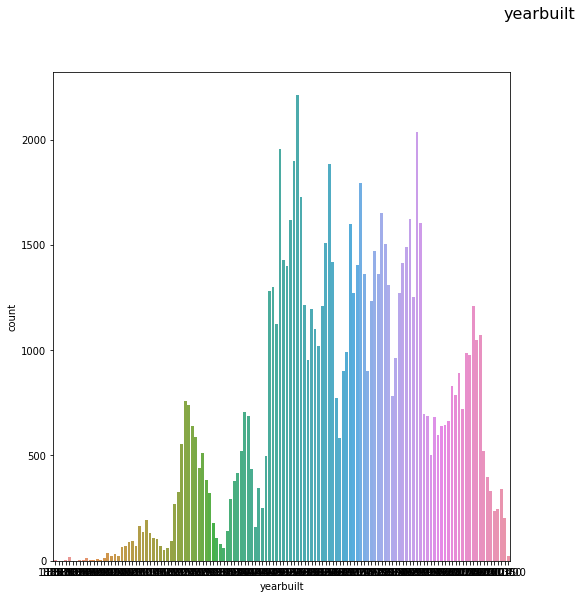

In [23]:
#Discrete Variables
discrete = ['bathroomcnt', 'bedroomcnt','garagecarcnt', 'roomcnt', 'unitcnt','assessmentyear', 'yearbuilt']

### Discrete variable plots
for col in discrete:
    values = train[col].dropna()   
    fig = plt.figure(figsize=(18,9));
    sns.countplot(x=values, ax = plt.subplot(121));
    plt.suptitle(col, fontsize=16)

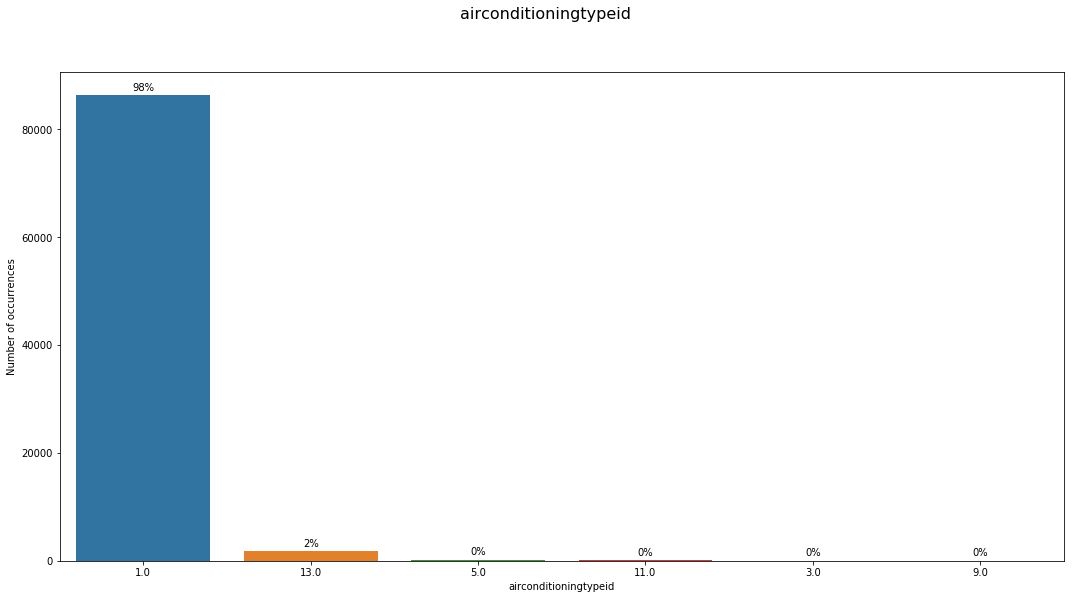

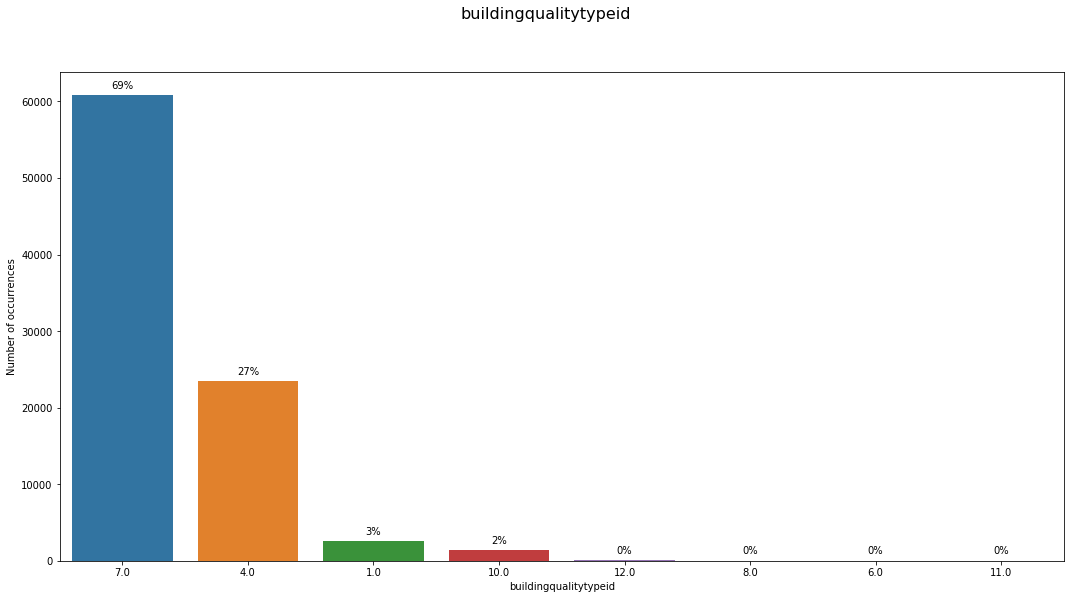

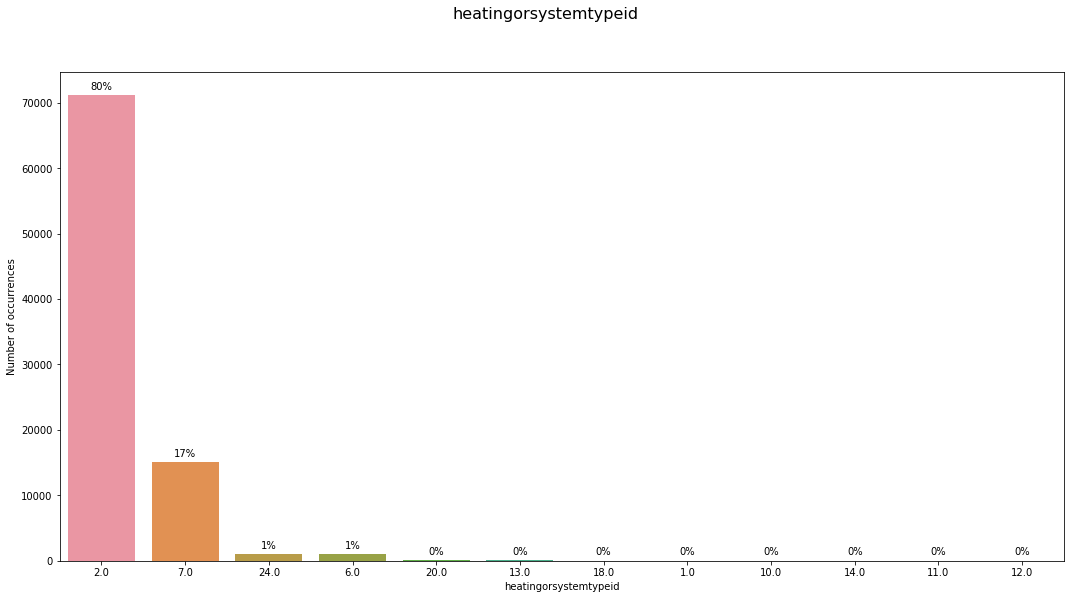

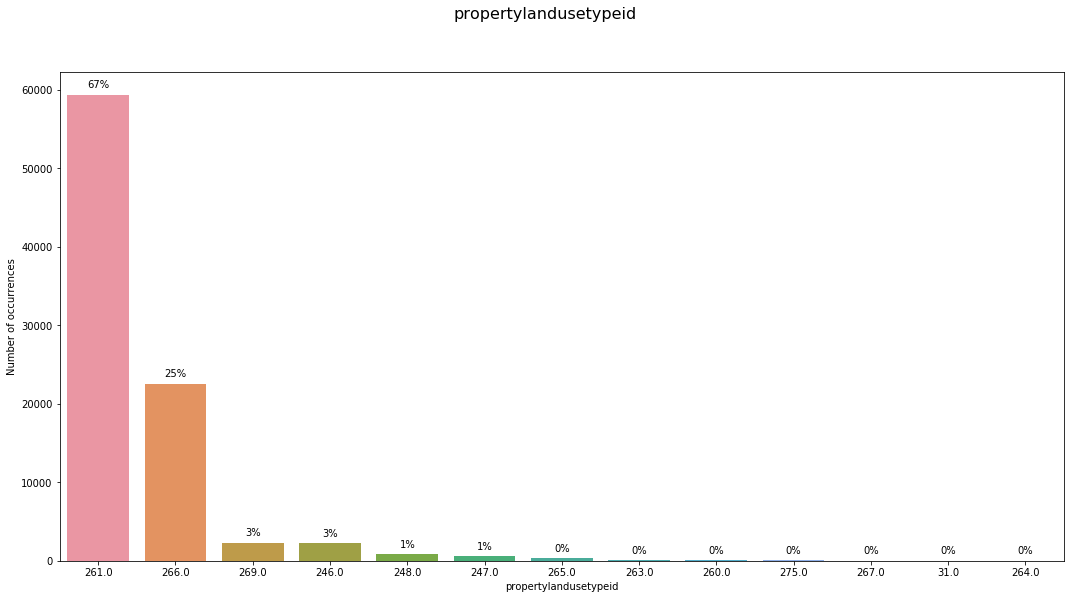

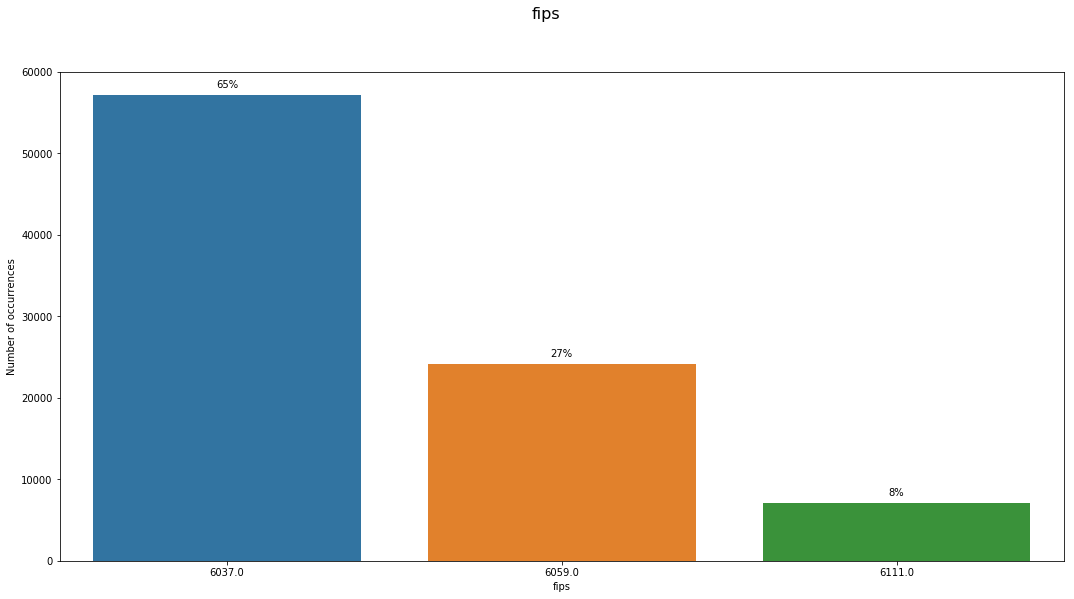

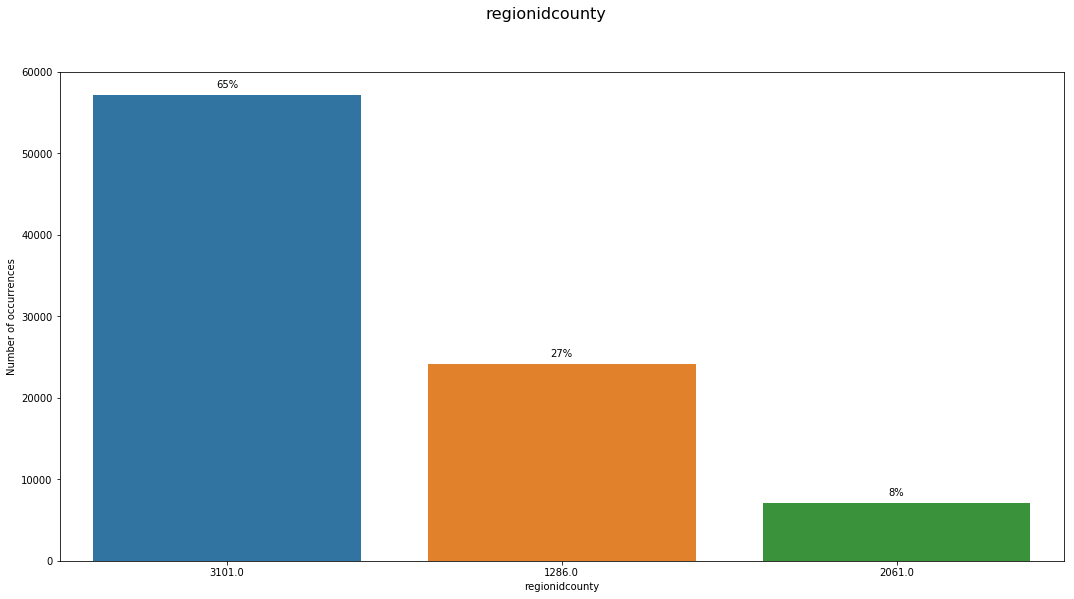

In [24]:
#Categorical Variables
categorical = ['airconditioningtypeid', 'buildingqualitytypeid', 'heatingorsystemtypeid',
               'propertylandusetypeid', 'fips', 'regionidcounty']

### Categorical variable plots
for col in categorical:
    values = train[col].astype('str').value_counts(dropna=False).to_frame().reset_index()
    values.columns = [col, 'counts']
    fig = plt.figure(figsize=(18,9))
    ax = sns.barplot(x=col, y='counts', data=values, order=values[col]);
    plt.xlabel(col);
    plt.ylabel('Number of occurrences')
    plt.suptitle(col, fontsize=16)

    ### Adding percents over bars
    height = [p.get_height() for p in ax.patches]    
    total = sum(height)
    for i, p in enumerate(ax.patches):    
        ax.text(p.get_x()+p.get_width()/2,
                height[i]+total*0.01,
                '{:1.0%}'.format(height[i]/total),
                ha="center")    

## Bivariate Analysis

<Figure size 1296x648 with 0 Axes>

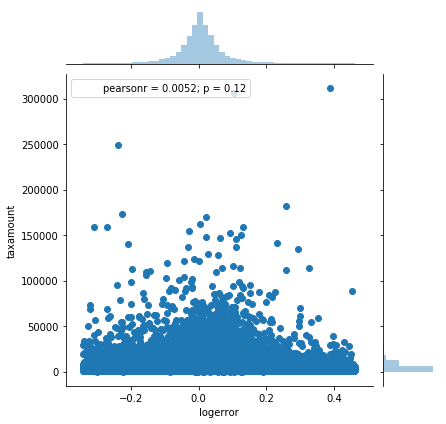

<Figure size 1296x648 with 0 Axes>

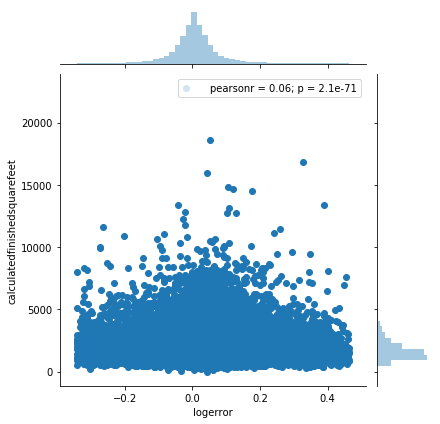

<Figure size 1296x648 with 0 Axes>

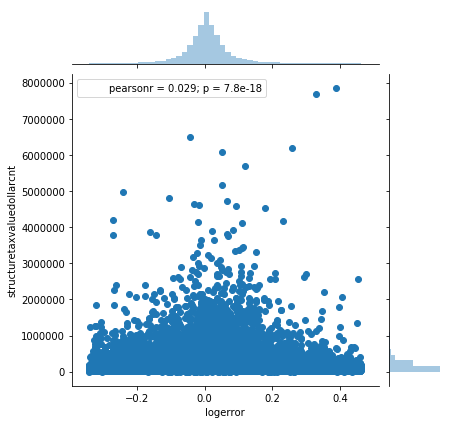

<Figure size 1296x648 with 0 Axes>

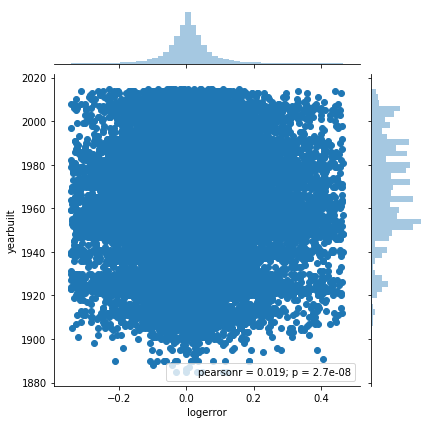

<Figure size 1296x648 with 0 Axes>

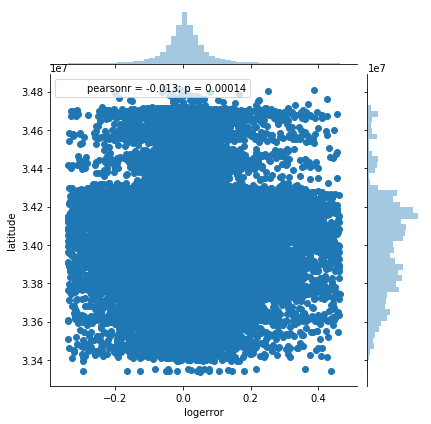

<Figure size 1296x648 with 0 Axes>

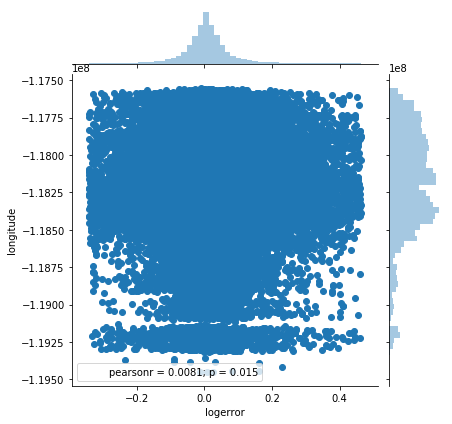

<Figure size 1296x648 with 0 Axes>

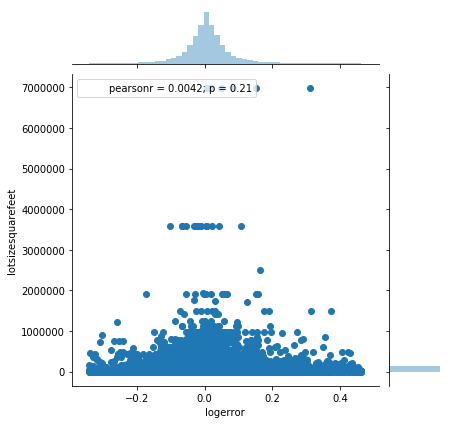

<Figure size 1296x648 with 0 Axes>

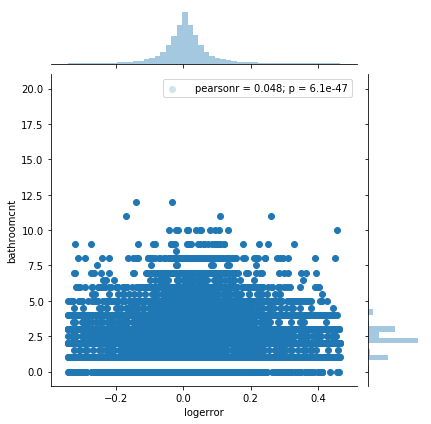

<Figure size 1296x648 with 0 Axes>

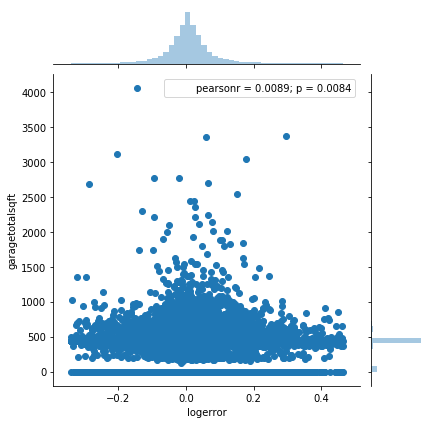

<Figure size 1296x648 with 0 Axes>

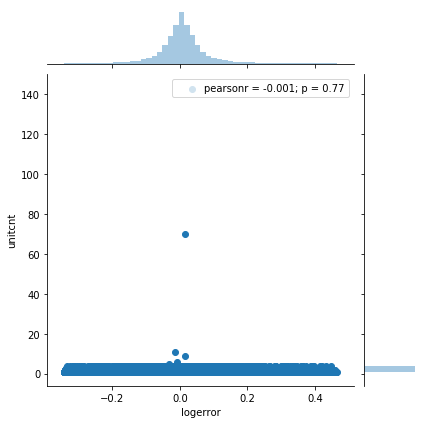

<Figure size 1296x648 with 0 Axes>

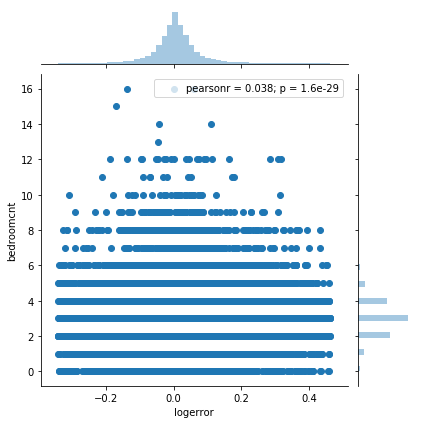

<Figure size 1296x648 with 0 Axes>

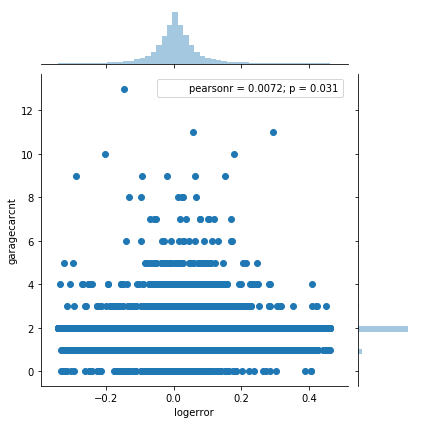

<Figure size 1296x648 with 0 Axes>

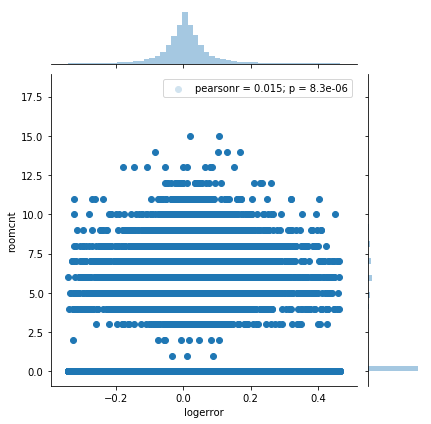

In [25]:
#Variables
variables = ['taxamount','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt',
                'yearbuilt','latitude','longitude',
                'lotsizesquarefeet',
                'bathroomcnt','garagetotalsqft',
                'unitcnt',
                'bedroomcnt','garagecarcnt','roomcnt']
                
for val in variables:
    values = train[val].dropna()   
    fig = plt.figure(figsize=(18,9));
    g= sns.jointplot(x=train.logerror,y=values)

## Feature Engineering

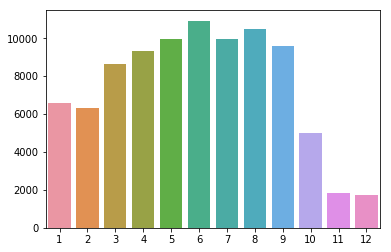

In [14]:
# Explore the transaction date distribution
plt.figure()
train['New_transaction_month'] = train['transactiondate'].dt.month
month_hist = train['New_transaction_month'].value_counts()
sns.barplot(month_hist.index, month_hist.values)

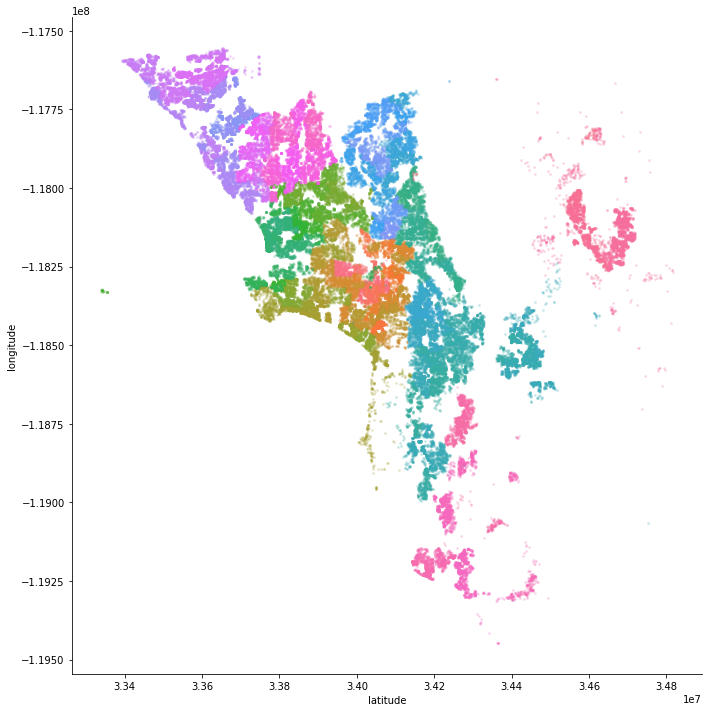

In [26]:
#Distribution among the zip codes.
sns.lmplot(x='latitude', y='longitude', data=train, size=10, hue='regionidzip', 
           fit_reg=False, legend=False, scatter_kws={'s': 3, 'alpha':0.2})
plt.show()

In [27]:
#Number of properties in the zip
zip_count = train['regionidzip'].value_counts().to_dict()
train['New_zip_count'] = train['regionidzip'].map(zip_count)

#Number of properties in the city
city_count = train['regionidcity'].value_counts().to_dict()
train['New_city_count'] = train['regionidcity'].map(city_count)

#proportion of living area
train['New_LivingAreaProp'] = train['calculatedfinishedsquarefeet']/train['lotsizesquarefeet']

In [38]:
#Separating logerror as test data
test = train.logerror

In [39]:
#Dropping meta columns
train = train.drop(['parcelid', 'logerror', 'transactiondate','propertyzoningdesc', 'propertycountylandusecode'], axis=1)

In [40]:
#Converting/Casting data types
for col, dtype in zip(train.columns, train.dtypes):
                if dtype == np.float64:
                    train[col] = train[col].astype(np.float32)
                if dtype == np.int64:
                    train[col] = train[col].astype(np.int32)

## Model Selection

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#Printing out all the Variables
typeDefinition = train.dtypes.reset_index()
typeDefinition.columns = ["Count", "Column Type"]
print(typeDefinition)

#Testing various Regression models
allModels = {} # Dictionary of models and their respective losses
scoringMean='neg_mean_absolute_error'
KFold=10

                           Count Column Type
0          airconditioningtypeid     float32
1                    bathroomcnt     float32
2                     bedroomcnt     float32
3          buildingqualitytypeid     float32
4   calculatedfinishedsquarefeet     float32
5                           fips     float32
6                   garagecarcnt     float32
7                garagetotalsqft     float32
8          heatingorsystemtypeid     float32
9                       latitude     float32
10                     longitude     float32
11             lotsizesquarefeet     float32
12         propertylandusetypeid     float32
13                  regionidcity     float32
14                regionidcounty     float32
15          regionidneighborhood     float32
16                   regionidzip     float32
17                       roomcnt     float32
18                       unitcnt     float32
19                     yearbuilt     float32
20    structuretaxvaluedollarcnt     float32
21        

In [59]:
modelName="Bayesian Ridge Regression"
model = linear_model.BayesianRidge()
predicted = cross_val_score(model, train, test, scoring=scoringMean, cv=KFold)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

Bayesian Ridge Regression score : -0.05314


In [62]:
modelName="Linear Regression"
model = linear_model.LinearRegression()
predicted = cross_val_score(model, train, test, scoring=scoringMean, cv=KFold)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

Linear Regression score : -0.05315


In [61]:
modelName="Ridge Regression"
model = linear_model.Ridge()
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

Ridge Regression score : -0.05315


In [63]:
modelName="Lasso Regression"
model = linear_model.Lasso()
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

Lasso Regression score : -0.05314


In [64]:
modelName="Decision Trees"
model = tree.DecisionTreeRegressor()
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

Decision Trees score : -0.08298


In [65]:
modelName="Random Forest"
model = RandomForestRegressor()
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

Random Forest score : -0.05912


In [66]:
modelName="KNN"
model = KNeighborsRegressor()
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

KNN score : -0.06117


In [67]:
modelName="XGB Regression"
model = XGBRegressor()
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

XGB Regression score : -0.05280


In [68]:
modelName="Gradient Boosted Regressor"
model = GradientBoostingRegressor()
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

Gradient Boosted Regressor score : -0.05286


In [77]:
from catboost import CatBoostRegressor
modelName="CatBoostRegressor Regressor"
model = CatBoostRegressor(verbose=False)
predicted = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=10)
allModels[model] = predicted.mean()
print("{} score : {:0.5f}".format(modelName, predicted.mean()))

CatBoostRegressor Regressor score : -0.05282


In [78]:
import operator
print("Returning the best model")
sortedModels = sorted(allModels.items(), key=operator.itemgetter(1), reverse=True)
model=sortedModels[0]
print ("Best Model : {}".format(model[0]))
print ("Loss of the Model : {}".format(model[1]))

Returning the best model
Best Model : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Loss of the Model : -0.052796701349816476


## Model Tuning


In [92]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

#            "n_estimators": [100,200,500,1000],

ncpu = multiprocessing.cpu_count()
#params = {
#            "nthread" : [ncpu],
#            "max_depth": [3,4,5,7,9],
#            "min_child_weight": [1,10,50,100],
#            "n_estimators": [10,100,500,1000],
#            "subsample" : [0.5, 0.8, 1],
#            "colsample_bytree" : [0.5, 1],
#            "learning_rate":[0.1, 0.01]
#         }
params = {
            "nthread" : [ncpu],
            "max_depth": [3],
            "min_child_weight": [100],
            "n_estimators": [100],
            "learning_rate":[0.1],
            "colsample_bytree" : [1],
            "subsample" : [0.8]
         }
model = XGBRegressor()  
xgb_cv    = GridSearchCV(model,params,verbose = 0,scoring='neg_mean_absolute_error')
xgb_cv.fit(train, test)  

print ('Best Score :', xgb_cv.best_score_)
print ('Best Parameters :', xgb_cv.best_params_)
print ('Best Estimator :', xgb_cv.best_estimator_)
#Running GridSearch on above parameters with various permutation and combination,
#Following parameters are considered as optimum parameters
#max_depth=3
#min_child_weight=100
#n_estimators=100
#learning_rate=0.1
#colsample_bytree=1
#subsample=0.8

Best Score : -0.052802641831849545
Best Parameters : {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 100, 'n_estimators': 100, 'nthread': 8, 'subsample': 0.8}
Best Estimator : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=100, missing=None, n_estimators=100,
       n_jobs=1, nthread=8, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)
